In [1]:
import pandas  as pd
import numpy as np

In [2]:
train=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/train.csv')
test=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/test.csv')

In [3]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [5]:
# 创建逻辑回归分类器
log_reg = LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)

In [6]:
# 设置要搜索的参数范围
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正则化强度
    'penalty': ['l1', 'l2'],        # 惩罚项
    'max_iter': [100, 200, 300]     # 迭代次数
}


In [7]:
# 创建网格搜索
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)


In [8]:
# 拟合模型
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             verbose=1)

In [9]:
# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

最佳参数： {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [10]:
# 用最佳参数的模型在测试集上进行预测
best_lr_clf = grid_search.best_estimator_

In [11]:

from sklearn.metrics import classification_report

# 预测测试集
y_pred =best_lr_clf.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       282
           1       0.44      0.13      0.20        55

    accuracy                           0.83       337
   macro avg       0.64      0.55      0.55       337
weighted avg       0.78      0.83      0.79       337



In [12]:
from sklearn.metrics import accuracy_score
# y_true 是真实标签，y_pred 是模型预测的标签
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.831


In [13]:
#计算混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm =confusion_matrix(y_test,y_pred)
cm

array([[273,   9],
       [ 48,   7]], dtype=int64)

In [14]:
# 提取混淆矩阵中的各项指标
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# 计算敏感度/召回率
sensitivity = TP / (TP + FN)
print(f"Sensitivity/Recall: {sensitivity:.3f}")

# 计算特异度
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.3f}")

# 计算假阳性率
FPR = FP / (FP + TN)
print(f"False Positive Rate: {FPR:.3f}")

# 计算假阴性率
FNR = FN / (FN + TP)
print(f"False Negative Rate: {FNR:.3f}")

# 计算阳性预测值
PPV = TP / (TP + FP)
print(f"Positive Predictive Value: {PPV:.3f}")

# 计算阴性预测值
NPV = TN / (TN + FN)
print(f"Negative Predictive Value: {NPV:.3f}")

# 计算F1分数
F1_score = 2 * (PPV * sensitivity) / (PPV + sensitivity)
print(f"F1 Score: {F1_score:.3f}")


Sensitivity/Recall: 0.127
Specificity: 0.968
False Positive Rate: 0.032
False Negative Rate: 0.873
Positive Predictive Value: 0.438
Negative Predictive Value: 0.850
F1 Score: 0.197


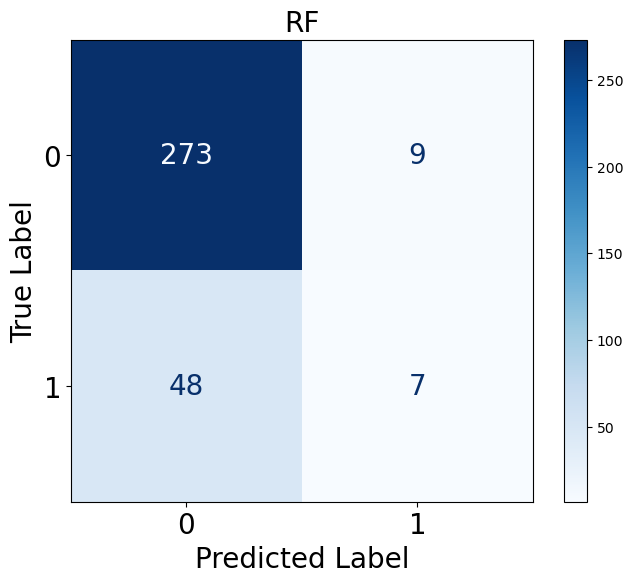

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('RF', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

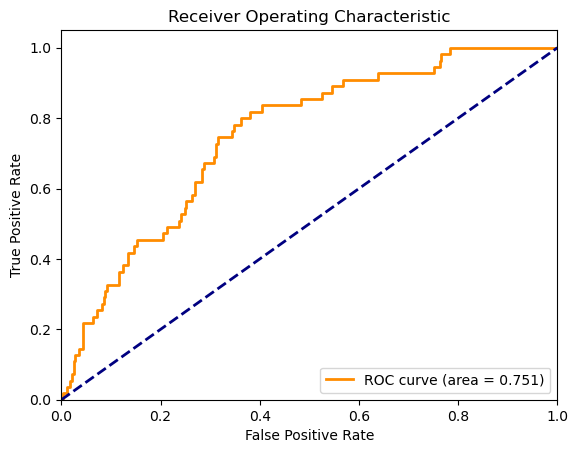

In [16]:
from sklearn.metrics import roc_curve, auc
# 预测概率
y_score = best_lr_clf.predict_proba(X_test)[:, 1]
# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
import joblib
# 保存模型
joblib.dump(best_lr_clf, 'LR.pkl')

['LR.pkl']

In [18]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [19]:
model = joblib.load('LR.pkl')

In [20]:
feature_names = ["Gender", "Age", "PIR", "Drinking", "Sleep_disorder", "Moderate_physical_activity", "Total_cholesterol"]

In [25]:
# Streamlit user interface
st.title("Predictors of depression in stroke patients")

DeltaGenerator()

In [26]:
# sex: categorical selection
Gender = st.selectbox("Gender (0=Male, 1=Female):", options=[0, 1], format_func=lambda x: 'Male (0)' if x == 0 else 'Female (1)')

# age: numerical input
Age = st.number_input("Age:", min_value=20, max_value=85, value=50)

# PIR: numerical input
PIR = st.number_input("PIR:", min_value=0, max_value=5, value=3)

# Dringking: categorical selection
Drinking = st.selectbox("Drinking (0=No, 1=Yes):", options=[0, 1], format_func=lambda x: 'No (0)' if x == 0 else 'Yes (1)')

# Sleep disorder: categorical selection
Sleep_disorder = st.selectbox("Sleep_disorder (0=No, 1=Yes):", options=[0, 1], format_func=lambda x: 'No (0)' if x == 0 else 'Yes (1)')

# sex: categorical selection
Moderate_physical_activity = st.selectbox("Moderate_physical_activity (0=No, 1=Yes):", options=[0, 1], format_func=lambda x: 'No (0)' if x == 0 else 'Yes (1)')

# PIR: numerical input
Total_cholesterol = st.number_input("Total_cholesterol:", min_value=2.07, max_value=9.98, value=6.0)

In [27]:
# Process inputs and make predictions
feature_values = [Gender, Age, PIR, Drinking, Sleep_disorder, Moderate_physical_activity, Total_cholesterol]
features = np.array([feature_values])

In [28]:
if st.button("Predict"):
    try:
        # Predict class and probabilities
        predicted_class = model.predict(features)[0]
        predicted_proba = model.predict_proba(features)[0]

        # Display prediction results
        st.write(f"**Predicted Class:** {predicted_class}")
        st.write(f"**Prediction Probabilities:** {predicted_proba}")

        # Generate advice based on prediction results
        probability = predicted_proba[predicted_class] * 100

        if predicted_class == 1:
            advice = (
                f"According to our model, you have a high risk of heart disease. "
                f"The model predicts that your probability of having heart disease is {probability:.1f}%. "
                "While this is just an estimate, it suggests that you may be at significant risk. "
                "I recommend that you consult a cardiologist as soon as possible for further evaluation and "
                "to ensure you receive an accurate diagnosis and necessary treatment."
            )
        else:
            advice = (
                f"According to our model, you have a low risk of heart disease. "
                f"The model predicts that your probability of not having heart disease is {probability:.1f}%. "
                "However, maintaining a healthy lifestyle is still very important. "
                "I recommend regular check-ups to monitor your heart health, "
                "and to seek medical advice promptly if you experience any symptoms."
            )

        st.write(advice)

        # Calculate SHAP values and display force plot
        with st.spinner("Calculating SHAP values..."):
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(pd.DataFrame([feature_values], columns=feature_names))

            shap.force_plot(explainer.expected_value, shap_values[0], pd.DataFrame([feature_values], columns=feature_names), matplotlib=True)
            plt.savefig("shap_force_plot.png", bbox_inches='tight', dpi=1200)

        # Display the SHAP force plot image
        st.image("shap_force_plot.png")

    except Exception as e:
        st.error(f"An error occurred: {str(e)}")
